In [64]:
from statistics import mean, median

import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

import noisereduce as nr
import numpy as np
import sklearn
from mutagen.mp3 import MP3

In [65]:
N_FFT = 1024  # Number of frequency bins for Fast Fourier Transform
HOP_SIZE = 1024  # Number of audio frames between STFT columns
SR = 44100  # Sampling frequency
N_MELS = 40  # Mel band parameters
WIN_SIZE = 1024  # number of samples in each STFT window
WINDOW_TYPE = "hann"  # the windowin function
FEATURE = "mel"  # feature representation
plt.rcParams["figure.figsize"] = (10, 4)

In [66]:
filePath = "EmberizaCitrinella45000.mp3"
y, sr = librosa.load(filePath, duration=20, mono=True)
y = nr.reduce_noise(audio_clip=y, noise_clip=y, prop_decrease=1, verbose=False)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


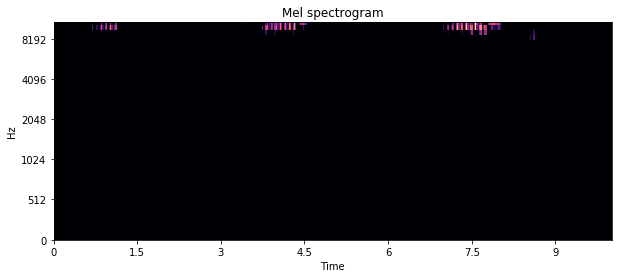

In [62]:
plt.figure()
librosa.display.specshow(
    librosa.core.amplitude_to_db(
        librosa.feature.melspectrogram(
            y=y,
            S=np.abs(
                librosa.stft(
                    y,
                    n_fft=N_FFT,
                    hop_length=HOP_SIZE,
                    window=WINDOW_TYPE,
                    win_length=WIN_SIZE,
                )
            )
            ** 2,
            sr=SR,
            n_fft=N_FFT,
            hop_length=HOP_SIZE,
            n_mels=N_MELS,
            htk=True,
            fmin=0.0,
            fmax=sr / 2.0,
        ),
        ref=1.0,
    ),
    sr=SR,
    hop_length=HOP_SIZE,
    x_axis="time",
    y_axis="mel",
)
plt.title("Mel spectrogram")
plt.show()

Text(0.5, 1.0, 'Mel spectrogram - simple code')

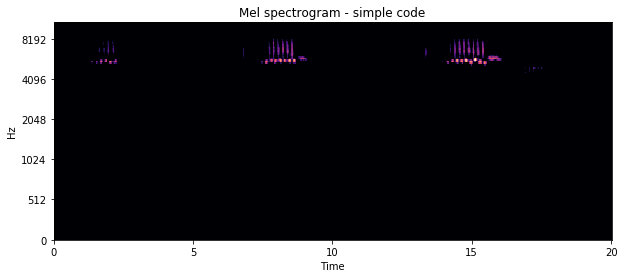

In [63]:
spectogram = librosa.display.specshow(
    librosa.core.amplitude_to_db(librosa.feature.melspectrogram(y=y, sr=SR)),
    x_axis="time",
    y_axis="mel",
)
plt.title("Mel spectrogram - simple code")

/home/ubuntu/anaconda3/lib/python3.7/site-packages/librosa/filters.py:222: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


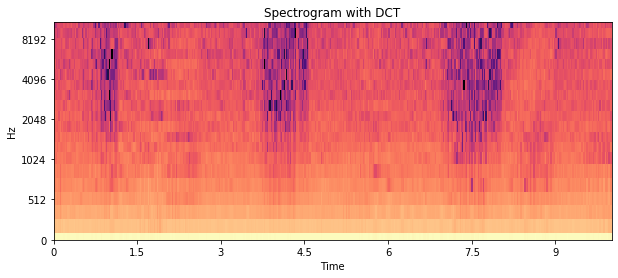

In [16]:
plt.figure()
librosa.display.specshow(
    librosa.core.amplitude_to_db(
        librosa.feature.mfcc(
            dct_type=3,
            y=y,
            sr=SR,
            n_fft=N_FFT,
            hop_length=HOP_SIZE,
            #    n_mels=N_MELS,
            htk=True,
            fmin=0.0,
            fmax=sr / 2.0,
        ),
        ref=1.0,
    ),
    sr=SR,
    hop_length=HOP_SIZE,
    x_axis="time",
    y_axis="mel",
)
plt.title("Spectrogram with DCT")
plt.show()

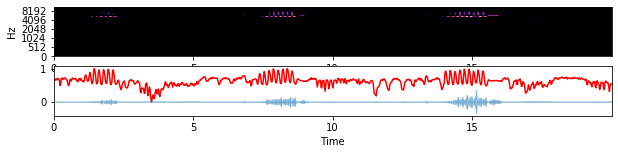

In [50]:
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)


def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)


plt.rcParams["figure.figsize"] = (10, 2)
ax1 = plt.subplot(2, 1, 1)
spectogram = librosa.display.specshow(
    librosa.core.amplitude_to_db(librosa.feature.melspectrogram(y=y, sr=SR)),
    x_axis="time",
    y_axis="mel",
)
plt.subplot(2, 1, 2, sharex=ax1)
librosa.display.waveplot(y=y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color="r")